In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install transformers gradio timm inflect phonemizer
!sudo apt-get update -y && sudo apt-get install -y espeak-ng
!pip install py-espeak-ng

In [2]:
from transformers.utils import logging

In [ ]:
logging.set_verbosity_error()

from transformers import pipeline
from PIL import Image
import gradio as gr
import os

In [ ]:
od_pipe = pipeline("object-detection", model="facebook/detr-resnet-50")


In [11]:
raw_image = Image.open("/kaggle/input/input-image-2/dog.jpg")  # replace with uploaded file
pipeline_output = od_pipe(raw_image)
pipeline_output[:3]  # show first few predictions

[{'score': 0.8178192377090454,
  'label': 'potted plant',
  'box': {'xmin': 58, 'ymin': 78, 'xmax': 103, 'ymax': 127}},
 {'score': 0.6246594786643982,
  'label': 'potted plant',
  'box': {'xmin': 682, 'ymin': 110, 'xmax': 723, 'ymax': 155}},
 {'score': 0.9994431138038635,
  'label': 'dog',
  'box': {'xmin': 131, 'ymin': 221, 'xmax': 309, 'ymax': 536}}]

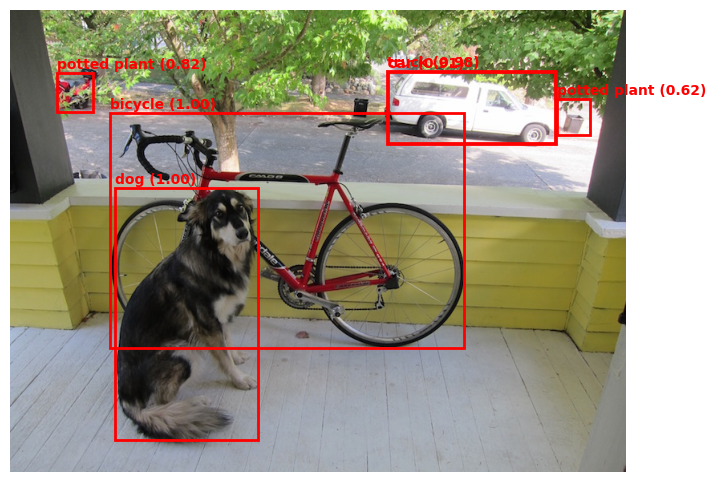

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def render_results_in_image(image, predictions):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    ax = plt.gca()

    for pred in predictions:
        box = pred["box"]
        label = pred["label"]
        score = pred["score"]

        rect = patches.Rectangle(
            (box["xmin"], box["ymin"]),
            box["xmax"] - box["xmin"],
            box["ymax"] - box["ymin"],
            linewidth=2,
            edgecolor="red",
            facecolor="none"
        )
        ax.add_patch(rect)
        ax.text(box["xmin"], box["ymin"] - 5,
                f"{label} ({score:.2f})",
                color="red", fontsize=10, weight="bold")
    plt.axis("off")
    plt.show()

render_results_in_image(raw_image, pipeline_output)
